In [1]:
#%pip install yfinance

In [1]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import random
from gym import Env
from gym.spaces import Discrete, Box
import matplotlib.pyplot as plt

In [2]:
def getTickerData(ticker, period, interval):
    hist = yf.download(tickers = ticker, period=period, interval=interval)
    df = pd.DataFrame(hist)
    df = df.reset_index()
    return df

In [3]:
df = getTickerData('btc-usd', 'max', '1d')
df = df.drop(columns={'Volume', 'Adj Close', 'Open', 'High', 'Low'})
df = df.rename(columns={'Close': 'close', 'Date': 'date'})
df['date'] = pd.to_datetime(df['date'])
df

[*********************100%***********************]  1 of 1 completed


,date,close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3140,2023-04-23,27591.384766
3141,2023-04-24,27525.339844
3142,2023-04-25,28307.597656
3143,2023-04-26,28422.701172


In [4]:
rn = random.randint(0, df.value_counts().sum())
i=0
df.shape[0] - rn

3096

366.92401123046875


,date,close
49,2014-11-05,339.485992
50,2014-11-06,349.290009
51,2014-11-07,342.415009
52,2014-11-08,345.488007
53,2014-11-09,363.264008


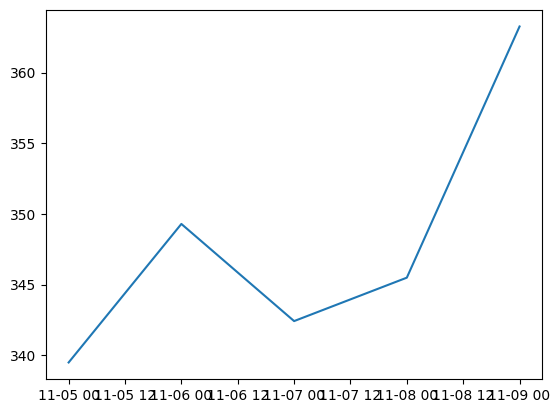

In [5]:
df2 = df.iloc[rn+i:rn+5+i,:]
final_value = df.iloc[rn+5+i]['close']
close_value = df.iloc[rn+4+i]['close']
plt.plot(df2['date'], df2['close'])
print(final_value)
i+=1
df2

In [6]:
class TradingEnv(Env):
    def __init__(self, df, n_steps, window_size) -> None:
        super().__init__()
        self.df = df.drop(columns={'date'})
        self.window_size = window_size
        self.observation_space = Box(low=-np.inf, high=np.inf, shape=(window_size, self.df.shape[1]))
        self.action_space = Discrete(2)
        self.done = None
        
        self.current_step = 0
        self.n_steps = n_steps
        self.random_index = random.randint(0, df.value_counts().sum())
        
        self.next_value = df.iloc[self.random_index+self.window_size+i]['close']
        
        self.long_pos = []
        self.short_pos = []
        
    def step(self, action):
        final_value = df.iloc[self.random_index+self.window_size+self.current_step-1]['close']
        if action == 0:
            self.short_pos.append(1)
            self.long_pos.append(0)
            if self.next_value < final_value:
                reward = 10
            else:
                reward = -100
        else:
            self.short_pos.append(0)
            self.long_pos.append(1)
            if self.next_value > final_value:
                reward = 10
            else:
                reward = -100
            
        self.current_step += 1
        
        if self.current_step > self.n_steps:
            done = True
        else:
            done = False
        
        observation = self.get_observation(index=self.current_step)
        info = {}
        
        return observation, reward, done, info
        
    def reset(self):
        self.random_index = random.randint(0, df.value_counts().sum())
        self.done = False
        self.current_step = 0
        return self.get_observation(is_random=True, index=0)
    
    def get_observation(self, index, is_random=False):
        needed_space = self.window_size + self.n_steps
        if is_random:
            self.random_index = random.randint(0, df.value_counts().sum())
            if df.shape[0] - self.random_index < needed_space:
                self.random_index = df.shape[0] - needed_space
        return self.df.iloc[self.random_index+index:self.random_index+self.window_size+index, :].values
    
    def close():
        pass
    
    def render():
        pass
    
    def render_final():
        pass

In [7]:
env = TradingEnv(df, window_size=90, n_steps=20)

False


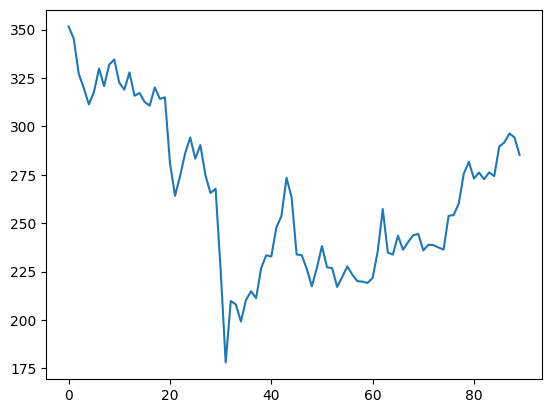

In [15]:
env.reset()
obs, reward, done, info = env.step(0)
plt.plot(obs)
print(done)

In [44]:
episodes = 20000
for n in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0
    while not done:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        score += reward
    print(f'episode - {n} || score - {score}')

episode - 1 || score - -1440
episode - 2 || score - -560
episode - 3 || score - -890
episode - 4 || score - -1110
episode - 5 || score - -1000
episode - 6 || score - -560
episode - 7 || score - -670
episode - 8 || score - -1330
episode - 9 || score - -1110
episode - 10 || score - -780
episode - 11 || score - -890
episode - 12 || score - -780
episode - 13 || score - -780
episode - 14 || score - -670
episode - 15 || score - -1110
episode - 16 || score - -670
episode - 17 || score - -450
episode - 18 || score - -1110
episode - 19 || score - -780
episode - 20 || score - -1110
episode - 21 || score - -1330
episode - 22 || score - -890
episode - 23 || score - -780
episode - 24 || score - -890
episode - 25 || score - -890
episode - 26 || score - -1440
episode - 27 || score - -1000
episode - 28 || score - -1550
episode - 29 || score - -780
episode - 30 || score - -1110
episode - 31 || score - -780
episode - 32 || score - -890
episode - 33 || score - -1220
episode - 34 || score - -780
episode -

KeyboardInterrupt: 